### Circuit Basics and Entanglement Practice

This notebook is to take a closer look at some of the linear algebra happening under the hood of the gates and see, mathematically, how entanglement is created and simulated.

In [1]:
# Import the needed packages and modules
import qiskit as qs
from math import pi

from qiskit import Aer

# Setting to make sure that visuals show up in the notebook while I'm working
%matplotlib inline

In [2]:
qs.__qiskit_version__

{'qiskit-terra': '0.15.1',
 'qiskit-aer': '0.6.1',
 'qiskit-ignis': '0.4.0',
 'qiskit-ibmq-provider': '0.8.0',
 'qiskit-aqua': '0.7.5',
 'qiskit': '0.20.0'}

Checking the unitary simulator - the matrix form of the gate

Checking the statevector simulator - the representation of the quantum state

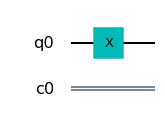

In [3]:
quant_reg = qs.QuantumRegister(1)
class_reg = qs.ClassicalRegister(1)

quant_circuit = qs.QuantumCircuit(quant_reg, class_reg)

quant_circuit.x(0)

quant_circuit.draw(output = 'mpl')

In [4]:
unitary_simulator = Aer.get_backend('unitary_simulator')
unitary_result = qs.execute(quant_circuit, backend = unitary_simulator).result()
unitary_matrix = unitary_result.get_unitary()
print(unitary_matrix)

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


In [5]:
state_simulator = Aer.get_backend('statevector_simulator')
state_result = qs.execute(quant_circuit, backend = state_simulator).result()
state_vector = state_result.get_statevector()
print(state_vector)

[0.+0.j 1.+0.j]


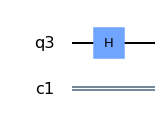

In [6]:
quant_reg = qs.QuantumRegister(1)
class_reg = qs.ClassicalRegister(1)

quant_circuit = qs.QuantumCircuit(quant_reg, class_reg)

quant_circuit.h(0)

quant_circuit.draw(output = 'mpl')

In [7]:
unitary_simulator = Aer.get_backend('unitary_simulator')
unitary_result = qs.execute(quant_circuit, backend = unitary_simulator).result()
unitary_matrix = unitary_result.get_unitary()
print(unitary_matrix)

[[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]]


In [8]:
state_simulator = Aer.get_backend('statevector_simulator')
state_result = qs.execute(quant_circuit, backend = state_simulator).result()
state_vector = state_result.get_statevector()
print(state_vector)

[0.70710678+0.j 0.70710678+0.j]


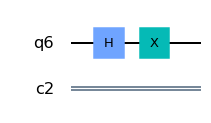

In [9]:
# Make a new circuit
quant_reg = qs.QuantumRegister(1)
class_reg = qs.ClassicalRegister(1)

quant_circuit = qs.QuantumCircuit(quant_reg, class_reg)

quant_circuit.h(0)
quant_circuit.x(0)

quant_circuit.draw(output = 'mpl')

In [10]:
unitary_simulator = Aer.get_backend('unitary_simulator')
unitary_result = qs.execute(quant_circuit, backend = unitary_simulator).result()
unitary_matrix = unitary_result.get_unitary()
print(unitary_matrix)

[[ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]]


In [11]:
state_simulator = Aer.get_backend('statevector_simulator')
state_result = qs.execute(quant_circuit, backend = state_simulator).result()
state_vector = state_result.get_statevector()
print(state_vector)

[0.70710678+0.j 0.70710678+0.j]


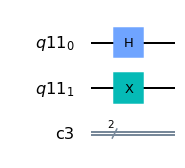

In [12]:
# Make a new circuit
quant_reg = qs.QuantumRegister(2)
class_reg = qs.ClassicalRegister(2)

quant_circuit = qs.QuantumCircuit(quant_reg, class_reg)
#quant_circuit = qs.QuantumCircuit(quant_reg)

quant_circuit.h(quant_reg[0])
quant_circuit.x(quant_reg[1])

quant_circuit.draw(output = 'mpl')

In [13]:
unitary_simulator = Aer.get_backend('unitary_simulator')
unitary_result = qs.execute(quant_circuit, backend = unitary_simulator).result()
unitary_matrix = unitary_result.get_unitary()
print(unitary_matrix)

[[ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]]


This is the tensor product of H and X:

![title](img\hx_tensorprod_unitary.png)

In the notebook, the operation has already been performed which is why there are so many .707 decimal values shown

In [14]:
state_simulator = Aer.get_backend('statevector_simulator')
state_result = qs.execute(quant_circuit, backend = state_simulator).result()
state_vector = state_result.get_statevector()
print(state_vector)

[0.        +0.j 0.        +0.j 0.70710678+0.j 0.70710678+0.j]


But what about the two gate one from the previous example?

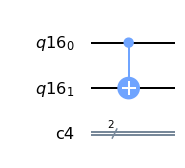

In [15]:
# Make a new circuit
quant_reg = qs.QuantumRegister(2)
class_reg = qs.ClassicalRegister(2)

quant_circuit = qs.QuantumCircuit(quant_reg, class_reg)

#quant_circuit.h(quant_reg[0])
quant_circuit.cx(quant_reg[0], quant_reg[1])

quant_circuit.draw(output = 'mpl')

In [16]:
unitary_simulator = Aer.get_backend('unitary_simulator')
unitary_result = qs.execute(quant_circuit, backend = unitary_simulator).result()
unitary_matrix = unitary_result.get_unitary()
print(unitary_matrix)

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


In [17]:
state_simulator = Aer.get_backend('statevector_simulator')
state_result = qs.execute(quant_circuit, backend = state_simulator).result()
state_vector = state_result.get_statevector()
print(state_vector)

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


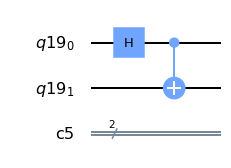

In [18]:
# Make a new circuit
quant_reg = qs.QuantumRegister(2)
class_reg = qs.ClassicalRegister(2)

quant_circuit = qs.QuantumCircuit(quant_reg, class_reg)

quant_circuit.h(quant_reg[0])
quant_circuit.cx(quant_reg[0], quant_reg[1])

quant_circuit.draw(output = 'mpl')

In [19]:
unitary_simulator = Aer.get_backend('unitary_simulator')
unitary_result = qs.execute(quant_circuit, backend = unitary_simulator).result()
unitary_matrix = unitary_result.get_unitary()
print(unitary_matrix)

[[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]]


![title](img\hcx_unitary_compare.png)

In [20]:
state_simulator = Aer.get_backend('statevector_simulator')
state_result = qs.execute(quant_circuit, backend = state_simulator).result()
state_vector = state_result.get_statevector()
print(state_vector)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


![title](img\hcx_state_compare.png)

Keep in mind that these have been computed and that 0.707 is 1/sqrt(2)

This shows that they are entangled and in what's known as a bell state